# Question 1

Import all relevant packages

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
def display_num_param(net):
	nb_param = 0
	for param in net.parameters():
	    nb_param += param.numel()
	print('There are {} ({:.2f} million) parameters in this neural network'.format(
		nb_param, nb_param/1e6)
	     )

In [3]:
def get_error( scores , labels ):

    bs=scores.size(0)
    predicted_labels = scores.argmax(dim=1)
    indicator = (predicted_labels == labels)
    num_matches=indicator.sum()
    
    return 1-num_matches.float()/bs 

In [4]:
def show_prob_mnist(p):

    p=p.data.squeeze().numpy()

    ft=15
    label = ('zero', 'one', 'two')
    #p=p.data.squeeze().numpy()
    y_pos = np.arange(len(p))*1.2
    target=2
    width=0.9
    col= 'blue'
    #col='darkgreen'

    plt.rcdefaults()
    fig, ax = plt.subplots()

    # the plot
    ax.barh(y_pos, p, width , align='center', color=col)

    ax.set_xlim([0, 1.3])
    #ax.set_ylim([-0.8, len(p)*1.2-1+0.8])

    # y label
    ax.set_yticks(y_pos)
    ax.set_yticklabels(label, fontsize=ft)
    ax.invert_yaxis()  
    #ax.set_xlabel('Performance')
    #ax.set_title('How fast do you want to go today?')

    # x label
    ax.set_xticklabels([])
    ax.set_xticks([])
    #x_pos=np.array([0, 0.25 , 0.5 , 0.75 , 1])
    #ax.set_xticks(x_pos)
    #ax.set_xticklabels( [0, 0.25 , 0.5 , 0.75 , 1] , fontsize=15)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_linewidth(4)


    for i in range(len(p)):
        str_nb="{0:.2f}".format(p[i])
        ax.text( p[i] + 0.05 , y_pos[i] ,str_nb ,
                 horizontalalignment='left', verticalalignment='center',
                 transform=ax.transData, color= col,fontsize=ft)



    plt.show()
    #fig.savefig('pic/prob', dpi=96, bbox_inches="tight")

In [5]:
#use this method to upload the mat file for usage
from google.colab import files
uploaded = files.upload()

Saving OQC.mat to OQC.mat


Download mat file

In [6]:
import os.path
v = loadmat("/content/OQC.mat")

In [7]:
print(v['data'])
print(len(v['data']))
print(v['data'][0][48])
train_frame = pd.DataFrame(v['data']).drop(48, axis =1)
train_labelframe = pd.DataFrame(v['data'])[48]

[[0.39052473 0.14779758 0.1563981  ... 0.07962529 0.92246927 2.        ]
 [0.39052473 0.14779758 0.1563981  ... 0.05367681 0.92148159 2.        ]
 [0.5084938  0.14779758 0.1563981  ... 0.05611241 0.9204939  2.        ]
 ...
 [0.54001505 0.00982888 0.77251185 ... 0.05611241 0.93135813 0.        ]
 [0.60664394 0.00982888 0.77251185 ... 0.05658079 0.93086416 0.        ]
 [0.7189506  0.00982888 0.77251185 ... 0.05658079 0.93086416 0.        ]]
2952
2.0


In [8]:
train_set, test_set,train_labels , test_labels = train_test_split(train_frame, train_labelframe,test_size = 0.3, train_size = 0.7)

print(train_set)
print(train_labels)

       0         1         2         3   ...     44        45        46        47
631   1.0  0.013105  0.881517  0.001694  ...  0.125  0.022576  0.022576  0.919506
304   1.0  0.144521  0.616114  0.002598  ...  0.125  0.022951  0.022951  0.912099
521   1.0  0.028395  0.696682  0.002598  ...  0.125  0.024262  0.024262  0.908642
2935  1.0  0.011649  0.848341  0.000075  ...  0.125  0.023981  0.023419  0.731358
2423  1.0  0.074991  0.540284  0.000151  ...  0.125  0.025855  0.025855  0.916543
...   ...       ...       ...       ...  ...    ...       ...       ...       ...
1648  1.0  0.104841  0.597156  0.001092  ...  0.250  0.024731  0.024731  0.974815
2009  1.0  0.081908  0.620853  0.000489  ...  0.250  0.024918  0.024824  0.931358
905   1.0  0.125228  0.592417  0.001732  ...  0.125  0.024075  0.024075  0.926420
1854  1.0  0.009101  0.630332  0.000489  ...  0.250  0.026698  0.026698  0.930370
1222  1.0  0.111030  0.298578  0.000791  ...  0.125  0.023232  0.023232  0.012840

[2066 rows x 48

Extract data from dataframe and place them into torch tensor




In [9]:
train_data = torch.Tensor(np.array(train_set))
print(train_data)
train_label = torch.LongTensor(train_labels.values)
print(train_label)
test_data = torch.Tensor(np.array(test_set))
test_label = torch.LongTensor(test_labels.values)

tensor([[1.0000, 0.0131, 0.8815,  ..., 0.0226, 0.0226, 0.9195],
        [1.0000, 0.1445, 0.6161,  ..., 0.0230, 0.0230, 0.9121],
        [1.0000, 0.0284, 0.6967,  ..., 0.0243, 0.0243, 0.9086],
        ...,
        [1.0000, 0.1252, 0.5924,  ..., 0.0241, 0.0241, 0.9264],
        [1.0000, 0.0091, 0.6303,  ..., 0.0267, 0.0267, 0.9304],
        [1.0000, 0.1110, 0.2986,  ..., 0.0232, 0.0232, 0.0128]])
tensor([0, 2, 0,  ..., 1, 0, 2])


Creation of Neural Network

In [10]:
class threefeed_layer_net(nn.Module):

    def __init__(self, input_size,hidden_layer1,hidden_layer2, output_size):
        super(threefeed_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, hidden_layer1 , bias=False)
        self.linear_layer1 = nn.Linear( hidden_layer1, hidden_layer2 , bias=False)
        self.linear_layer2 = nn.Linear( hidden_layer2, output_size , bias=False)

        
    def forward(self, x):
        score = self.linear_layer(x)
        score = F.relu(score)
        score = self.linear_layer1(score)
        score = F.relu(score)
        score = self.linear_layer2(score)
        return score

In [11]:
mynet = threefeed_layer_net(48,100,100,3)
print(mynet)
display_num_param(mynet)

threefeed_layer_net(
  (linear_layer): Linear(in_features=48, out_features=100, bias=False)
  (linear_layer1): Linear(in_features=100, out_features=100, bias=False)
  (linear_layer2): Linear(in_features=100, out_features=3, bias=False)
)
There are 15100 (0.02 million) parameters in this neural network


In [12]:
criterion = nn.CrossEntropyLoss()

bs=30

In [13]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    for i in range(0,866,bs):

        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        inputs = minibatch_data

        scores=mynet( inputs ) 

        error = get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

In [14]:
start = time.time()

lr = 0.02 # initial learning rate
# learning rate strategy : divide the learning rate by 1.5 every 10 epochs
    #if epoch%10==0 and epoch>10: 
        #lr = lr / 1.5
    
    # create a new optimizer at the beginning of each epoch: give the current learning rate.   
optimizer=torch.optim.SGD( mynet.parameters() , lr=lr )

for epoch in range(200):
    
    
        
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(2066)
 
    for count in range(0,2066,bs):
        
        # forward and backward pass
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data

        inputs.requires_grad_()

        scores=mynet( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute some stats
        
        running_loss += loss.detach().item()
               
        error = get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set  
    
    if epoch % 10 == 0 : 
    
        print(' ')
        
        print('epoch=',epoch, ' time=', elapsed_time,
              ' loss=', total_loss , ' error=', total_error*100 ,'percent lr=', lr)
        
        eval_on_test_set()

 
epoch= 0  time= 0.31389474868774414  loss= 1.099479910256206  error= 68.82943070453146 percent lr= 0.02
test error  =  64.48275755191672 percent
 
epoch= 10  time= 0.7881956100463867  loss= 0.531231365342071  error= 10.174657210059788 percent lr= 0.02
test error  =  8.620690477305445 percent
 
epoch= 20  time= 1.2430038452148438  loss= 0.19174920821535416  error= 6.714977043262427 percent lr= 0.02
test error  =  6.66666791356843 percent
 
epoch= 30  time= 1.7350986003875732  loss= 0.12364536728979884  error= 4.024527470270792 percent lr= 0.02
test error  =  4.942529982533948 percent
 
epoch= 40  time= 2.1974077224731445  loss= 0.07628323253838049  error= 1.449276226154272 percent lr= 0.02
test error  =  2.1839086351723505 percent
 
epoch= 50  time= 2.6750924587249756  loss= 0.04563903573738492  error= 0.6280196749645731 percent lr= 0.02
test error  =  0.34482787395345754 percent
 
epoch= 60  time= 3.1193807125091553  loss= 0.031231420647784853  error= 0.24897827618363977 percent lr= 

tensor(0)


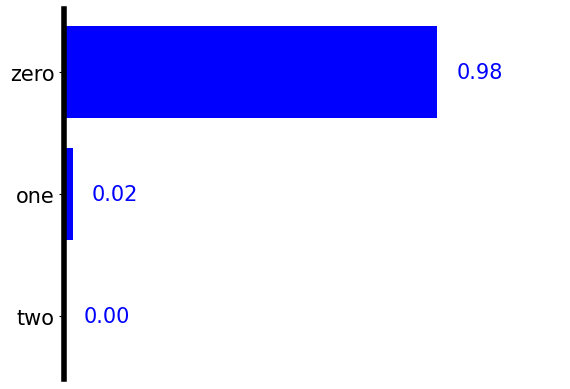

In [15]:
#p = mynet(im.view(1,48))
# choose a picture at random
idx=randint(0, 866)
im=test_data[idx]

# diplay the picture
print(test_label[idx])

# feed it to the net and display the confidence scores
scores =  mynet( im.view(1,48)) 
probs= F.softmax(scores, dim=1)
show_prob_mnist(probs)

# Question 2

Testing 200 in hidden nodes/ Wide Network

In [16]:
mynet_2 = threefeed_layer_net(48,200,200,3)
print(mynet_2)
display_num_param(mynet_2)

threefeed_layer_net(
  (linear_layer): Linear(in_features=48, out_features=200, bias=False)
  (linear_layer1): Linear(in_features=200, out_features=200, bias=False)
  (linear_layer2): Linear(in_features=200, out_features=3, bias=False)
)
There are 50200 (0.05 million) parameters in this neural network


In [17]:
criterion = nn.CrossEntropyLoss()

bs=100

In [18]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    for i in range(0,866,bs):

        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        inputs = minibatch_data

        scores=mynet_2( inputs ) 

        error = get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

In [19]:
start = time.time()

lr = 0.02 # initial learning rate
# learning rate strategy : divide the learning rate by 1.5 every 10 epochs
    #if epoch%10==0 and epoch>10: 
        #lr = lr / 1.5
    
    # create a new optimizer at the beginning of each epoch: give the current learning rate.   
optimizer=torch.optim.SGD( mynet_2.parameters() , lr=lr )

for epoch in range(200):
    
    
        
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(2066)
 
    for count in range(0,2066,bs):
        
        # forward and backward pass
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data

        inputs.requires_grad_()

        scores=mynet_2( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute some stats
        
        running_loss += loss.detach().item()
               
        error = get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set  
    
    if epoch % 10 == 0 : 
    
        print(' ')
        
        print('epoch=',epoch, ' time=', elapsed_time,
              ' loss=', total_loss , ' error=', total_error*100 ,'percent lr=', lr)
        
        eval_on_test_set()

 
epoch= 0  time= 0.03594398498535156  loss= 1.096193449837821  error= 64.9624818847293 percent lr= 0.02
test error  =  65.7364328702291 percent
 
epoch= 10  time= 0.3121483325958252  loss= 1.0208509677932376  error= 35.37950884728205 percent lr= 0.02
test error  =  34.65374708175659 percent
 
epoch= 20  time= 0.5922431945800781  loss= 0.7241206623259044  error= 9.911977109454927 percent lr= 0.02
test error  =  7.7002578311496315 percent
 
epoch= 30  time= 0.895296573638916  loss= 0.40423930968557087  error= 9.242423943110875 percent lr= 0.02
test error  =  8.496124214596218 percent
 
epoch= 40  time= 1.1849822998046875  loss= 0.2708092260928381  error= 8.099566187177386 percent lr= 0.02
test error  =  7.255813810560438 percent
 
epoch= 50  time= 1.4595434665679932  loss= 0.2080088271981194  error= 6.646464268366496 percent lr= 0.02
test error  =  6.0155040687984895 percent
 
epoch= 60  time= 1.74281644821167  loss= 0.16954890283800306  error= 5.406926359449114 percent lr= 0.02
test er

Test 150 hidden nodes

In [20]:
mynet_21 = threefeed_layer_net(48,150,150,3)
print(mynet_21)
display_num_param(mynet_21)

threefeed_layer_net(
  (linear_layer): Linear(in_features=48, out_features=150, bias=False)
  (linear_layer1): Linear(in_features=150, out_features=150, bias=False)
  (linear_layer2): Linear(in_features=150, out_features=3, bias=False)
)
There are 30150 (0.03 million) parameters in this neural network


In [21]:
criterion = nn.CrossEntropyLoss()

bs=100

In [22]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    for i in range(0,866,bs):

        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        inputs = minibatch_data

        scores=mynet_21( inputs ) 

        error = get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

In [23]:
start = time.time()

lr = 0.02 # initial learning rate
# learning rate strategy : divide the learning rate by 1.5 every 10 epochs
    #if epoch%10==0 and epoch>10: 
        #lr = lr / 1.5
    
    # create a new optimizer at the beginning of each epoch: give the current learning rate.   
optimizer=torch.optim.SGD( mynet_21.parameters() , lr=lr )

for epoch in range(200):
    
    
        
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(2066)
 
    for count in range(0,2066,bs):
        
        # forward and backward pass
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data

        inputs.requires_grad_()

        scores=mynet_21( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute some stats
        
        running_loss += loss.detach().item()
               
        error = get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set  
    
    if epoch % 10 == 0 : 
    
        print(' ')
        
        print('epoch=',epoch, ' time=', elapsed_time,
              ' loss=', total_loss , ' error=', total_error*100 ,'percent lr=', lr)
        
        eval_on_test_set()

 
epoch= 0  time= 0.02823328971862793  loss= 1.09371855145409  error= 62.50649350030082 percent lr= 0.02
test error  =  65.90180794397989 percent
 
epoch= 10  time= 0.2636277675628662  loss= 1.041199076743353  error= 42.282827979042416 percent lr= 0.02
test error  =  45.48062086105347 percent
 
epoch= 20  time= 0.4876749515533447  loss= 0.8463927961531139  error= 15.84127006076631 percent lr= 0.02
test error  =  18.32558181550768 percent
 
epoch= 30  time= 0.7213995456695557  loss= 0.48206779786518644  error= 9.339105231421334 percent lr= 0.02
test error  =  9.03359121746487 percent
 
epoch= 40  time= 0.9575271606445312  loss= 0.3033700571173713  error= 8.26695476259504 percent lr= 0.02
test error  =  8.126615153418646 percent
 
epoch= 50  time= 1.233644962310791  loss= 0.22541868260928563  error= 7.12698329062689 percent lr= 0.02
test error  =  6.793281767103407 percent
 
epoch= 60  time= 1.4719631671905518  loss= 0.182184969385465  error= 6.051947956993466 percent lr= 0.02
test error

Test 100 hidden nodes

In [24]:
mynet_22 = threefeed_layer_net(48,100,100,3)
print(mynet_22)
display_num_param(mynet_22)

threefeed_layer_net(
  (linear_layer): Linear(in_features=48, out_features=100, bias=False)
  (linear_layer1): Linear(in_features=100, out_features=100, bias=False)
  (linear_layer2): Linear(in_features=100, out_features=3, bias=False)
)
There are 15100 (0.02 million) parameters in this neural network


In [25]:
criterion = nn.CrossEntropyLoss()

bs=100

In [26]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    for i in range(0,866,bs):

        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        inputs = minibatch_data

        scores=mynet_22( inputs ) 

        error = get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

In [27]:
start = time.time()

lr = 0.02 # initial learning rate
# learning rate strategy : divide the learning rate by 1.5 every 10 epochs
    #if epoch%10==0 and epoch>10: 
        #lr = lr / 1.5
    
    # create a new optimizer at the beginning of each epoch: give the current learning rate.   
optimizer=torch.optim.SGD( mynet_22.parameters() , lr=lr )

for epoch in range(200):
    
    
        
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(2066)
 
    for count in range(0,2066,bs):
        
        # forward and backward pass
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data

        inputs.requires_grad_()

        scores=mynet_22( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute some stats
        
        running_loss += loss.detach().item()
               
        error = get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set  
    
    if epoch % 10 == 0 : 
    
        print(' ')
        
        print('epoch=',epoch, ' time=', elapsed_time,
              ' loss=', total_loss , ' error=', total_error*100 ,'percent lr=', lr)
        
        eval_on_test_set()

 
epoch= 0  time= 0.020529985427856445  loss= 1.0942318780081612  error= 60.075036684672035 percent lr= 0.02
test error  =  61.217055055830215 percent
 
epoch= 10  time= 0.20743012428283691  loss= 1.0439789579028176  error= 43.21067872501555 percent lr= 0.02
test error  =  46.59431576728821 percent
 
epoch= 20  time= 0.3860664367675781  loss= 0.8558942278226217  error= 16.222222646077476 percent lr= 0.02
test error  =  14.604650603400337 percent
 
epoch= 30  time= 0.5739879608154297  loss= 0.485305803162711  error= 8.432900054114205 percent lr= 0.02
test error  =  7.219637764824761 percent
 
epoch= 40  time= 0.7623505592346191  loss= 0.303571282398133  error= 8.02597375143142 percent lr= 0.02
test error  =  6.571059756808811 percent
 
epoch= 50  time= 0.9393689632415771  loss= 0.22613987042790368  error= 6.717172123136975 percent lr= 0.02
test error  =  5.904393063651191 percent
 
epoch= 60  time= 1.1148531436920166  loss= 0.18311893088477  error= 5.883116949172247 percent lr= 0.02
tes

Testing with 50 hidden nodes

In [28]:
mynet_23 = threefeed_layer_net(48,50,50,3)
print(mynet_23)
display_num_param(mynet_23)

threefeed_layer_net(
  (linear_layer): Linear(in_features=48, out_features=50, bias=False)
  (linear_layer1): Linear(in_features=50, out_features=50, bias=False)
  (linear_layer2): Linear(in_features=50, out_features=3, bias=False)
)
There are 5050 (0.01 million) parameters in this neural network


In [29]:
criterion = nn.CrossEntropyLoss()

bs=100

In [30]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    for i in range(0,866,bs):

        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        inputs = minibatch_data

        scores=mynet_23( inputs ) 

        error = get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

In [31]:
start = time.time()

lr = 0.02 # initial learning rate
# learning rate strategy : divide the learning rate by 1.5 every 10 epochs
    #if epoch%10==0 and epoch>10: 
        #lr = lr / 1.5
    
    # create a new optimizer at the beginning of each epoch: give the current learning rate.   
optimizer=torch.optim.SGD( mynet_23.parameters() , lr=lr )

for epoch in range(200):
    
    
        
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(2066)
 
    for count in range(0,2066,bs):
        
        # forward and backward pass
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data

        inputs.requires_grad_()

        scores=mynet_23( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute some stats
        
        running_loss += loss.detach().item()
               
        error = get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set  
    
    if epoch % 10 == 0 : 
    
        print(' ')
        
        print('epoch=',epoch, ' time=', elapsed_time,
              ' loss=', total_loss , ' error=', total_error*100 ,'percent lr=', lr)
        
        eval_on_test_set()

 
epoch= 0  time= 0.01446533203125  loss= 1.101999050094968  error= 66.8398258231935 percent lr= 0.02
test error  =  67.08527008692423 percent
 
epoch= 10  time= 0.15934085845947266  loss= 1.0738955111730666  error= 57.2135641461327 percent lr= 0.02
test error  =  58.514211575190224 percent
 
epoch= 20  time= 0.3113899230957031  loss= 1.0193904155776614  error= 47.539683183034256 percent lr= 0.02
test error  =  50.31266212463379 percent
 
epoch= 30  time= 0.46126270294189453  loss= 0.7844646800132025  error= 15.248195897965205 percent lr= 0.02
test error  =  16.253229644563465 percent
 
epoch= 40  time= 0.623272180557251  loss= 0.45776541460128056  error= 9.910533541724794 percent lr= 0.02
test error  =  9.589146905475193 percent
 
epoch= 50  time= 0.7889432907104492  loss= 0.3062958050341833  error= 9.457431804566156 percent lr= 0.02
test error  =  9.273901250627306 percent
 
epoch= 60  time= 0.953972339630127  loss= 0.23924636202199118  error= 8.217893327985491 percent lr= 0.02
test 

Test with 0 hidden layers / Shallow Network

In [32]:
class zero_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(zero_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)

        
    def forward(self, x):
        score = self.linear_layer(x)
        return score

In [33]:
mynet_24 = zero_layer_net(48,3)
print(mynet_24)
display_num_param(mynet_24)

zero_layer_net(
  (linear_layer): Linear(in_features=48, out_features=3, bias=False)
)
There are 144 (0.00 million) parameters in this neural network


In [34]:
criterion = nn.CrossEntropyLoss()

bs=40

In [35]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    for i in range(0,866,bs):

        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        inputs = minibatch_data

        scores=mynet_24( inputs ) 

        error = get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

In [36]:
start = time.time()

lr = 0.02 # initial learning rate
# learning rate strategy : divide the learning rate by 1.5 every 10 epochs
    #if epoch%10==0 and epoch>10: 
        #lr = lr / 1.5
    
    # create a new optimizer at the beginning of each epoch: give the current learning rate.   
optimizer=torch.optim.SGD( mynet_24.parameters() , lr=lr )

for epoch in range(200):
    
    
        
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(2066)
 
    for count in range(0,2066,bs):
        
        # forward and backward pass
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data

        inputs.requires_grad_()

        scores=mynet_24( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute some stats
        
        running_loss += loss.detach().item()
               
        error = get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set  
    
    if epoch % 10 == 0 : 
    
        print(' ')
        
        print('epoch=',epoch, ' time=', elapsed_time,
              ' loss=', total_loss , ' error=', total_error*100 ,'percent lr=', lr)
        
        eval_on_test_set()

 
epoch= 0  time= 0.02588176727294922  loss= 1.0687849177764013  error= 56.56065092636988 percent lr= 0.02
test error  =  54.20454550873149 percent
 
epoch= 10  time= 0.23439502716064453  loss= 0.7593454111080903  error= 14.815088762686804 percent lr= 0.02
test error  =  14.090908657420764 percent
 
epoch= 20  time= 0.4573214054107666  loss= 0.6190256430552556  error= 9.238165731613453 percent lr= 0.02
test error  =  8.977273106575012 percent
 
epoch= 30  time= 0.6738286018371582  loss= 0.5368733383142031  error= 7.991863787174225 percent lr= 0.02
test error  =  7.159090854904869 percent
 
epoch= 40  time= 0.885610818862915  loss= 0.48122447671798557  error= 7.1412722651775065 percent lr= 0.02
test error  =  7.045454599640586 percent
 
epoch= 50  time= 1.1195409297943115  loss= 0.4413531611745174  error= 6.95266265135545 percent lr= 0.02
test error  =  6.7045452919873325 percent
 
epoch= 60  time= 1.332228660583496  loss= 0.41042995109007907  error= 6.538461492611812 percent lr= 0.02
t

Test with 1 hidden layers 


In [37]:
class one_layer_net(nn.Module):

    def __init__(self, input_size,hidden_layer1, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, hidden_layer1 , bias=False)
        self.linear_layer1 = nn.Linear( hidden_layer1, output_size , bias=False)

        
    def forward(self, x):
        score = self.linear_layer(x)
        score = F.relu(score)
        score = self.linear_layer1(score)
        return score

In [38]:
mynet_25 = one_layer_net(48,100,3)
print(mynet_25)
display_num_param(mynet_25)

one_layer_net(
  (linear_layer): Linear(in_features=48, out_features=100, bias=False)
  (linear_layer1): Linear(in_features=100, out_features=3, bias=False)
)
There are 5100 (0.01 million) parameters in this neural network


In [39]:
criterion = nn.CrossEntropyLoss()

bs=40

In [40]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    for i in range(0,866,bs):

        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        inputs = minibatch_data

        scores=mynet_25( inputs ) 

        error = get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

In [41]:
start = time.time()

lr = 0.02 # initial learning rate
# learning rate strategy : divide the learning rate by 1.5 every 10 epochs
    #if epoch%10==0 and epoch>10: 
        #lr = lr / 1.5
    
    # create a new optimizer at the beginning of each epoch: give the current learning rate.   
optimizer=torch.optim.SGD( mynet_25.parameters() , lr=lr )

for epoch in range(200):
    
    
        
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(2066)
 
    for count in range(0,2066,bs):
        
        # forward and backward pass
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data

        inputs.requires_grad_()

        scores=mynet_25( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute some stats
        
        running_loss += loss.detach().item()
               
        error = get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set  
    
    if epoch % 10 == 0 : 
    
        print(' ')
        
        print('epoch=',epoch, ' time=', elapsed_time,
              ' loss=', total_loss , ' error=', total_error*100 ,'percent lr=', lr)
        
        eval_on_test_set()

 
epoch= 0  time= 0.026780366897583008  loss= 1.0946396107857044  error= 60.72485217681298 percent lr= 0.02
test error  =  56.2499997290698 percent
 
epoch= 10  time= 0.31296372413635254  loss= 0.6412028486912067  error= 7.407544324031242 percent lr= 0.02
test error  =  6.022726676680825 percent
 
epoch= 20  time= 0.5916991233825684  loss= 0.34956725858725035  error= 5.628697574138641 percent lr= 0.02
test error  =  5.113635008985346 percent
 
epoch= 30  time= 0.8808426856994629  loss= 0.23899825748342735  error= 4.711538323989281 percent lr= 0.02
test error  =  5.227271806110035 percent
 
epoch= 40  time= 1.165977954864502  loss= 0.18479963162770638  error= 4.4970410374494705 percent lr= 0.02
test error  =  5.227272077040239 percent
 
epoch= 50  time= 1.4291472434997559  loss= 0.14865599672954816  error= 3.872041289622967 percent lr= 0.02
test error  =  4.204545237801292 percent
 
epoch= 60  time= 1.7027196884155273  loss= 0.12478016066150023  error= 3.173076304105612 percent lr= 0.02

Test with 2 hidden layer network

In [42]:
class two_layer_net(nn.Module):

    def __init__(self, input_size,hidden_layer1, hidden_layer2, output_size):
        super(two_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, hidden_layer1 , bias=False)
        self.linear_layer1 = nn.Linear( hidden_layer1, hidden_layer2 , bias=False)
        self.linear_layer2 = nn.Linear( hidden_layer2, output_size , bias=False)

        
    def forward(self, x):
        score = self.linear_layer(x)
        score = F.relu(score)
        score = self.linear_layer1(score)
        score = F.relu(score)
        score = self.linear_layer2(score)
        return score

In [43]:
mynet_26 = two_layer_net(48,100,100,3)
print(mynet_26)
display_num_param(mynet_26)

two_layer_net(
  (linear_layer): Linear(in_features=48, out_features=100, bias=False)
  (linear_layer1): Linear(in_features=100, out_features=100, bias=False)
  (linear_layer2): Linear(in_features=100, out_features=3, bias=False)
)
There are 15100 (0.02 million) parameters in this neural network


In [44]:
criterion = nn.CrossEntropyLoss()

bs=40

In [45]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    for i in range(0,866,bs):

        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        inputs = minibatch_data

        scores=mynet_26( inputs ) 

        error = get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

In [46]:
start = time.time()

lr = 0.02 # initial learning rate
# learning rate strategy : divide the learning rate by 1.5 every 10 epochs
    #if epoch%10==0 and epoch>10: 
        #lr = lr / 1.5
    
    # create a new optimizer at the beginning of each epoch: give the current learning rate.   
optimizer=torch.optim.SGD( mynet_26.parameters() , lr=lr )

for epoch in range(200):
    
    
        
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(2066)
 
    for count in range(0,2066,bs):
        
        # forward and backward pass
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data

        inputs.requires_grad_()

        scores=mynet_26( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute some stats
        
        running_loss += loss.detach().item()
               
        error = get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set  
    
    if epoch % 10 == 0 : 
    
        print(' ')
        
        print('epoch=',epoch, ' time=', elapsed_time,
              ' loss=', total_loss , ' error=', total_error*100 ,'percent lr=', lr)
        
        eval_on_test_set()

 
epoch= 0  time= 0.03328561782836914  loss= 1.0930483891413763  error= 63.84985206218866 percent lr= 0.02
test error  =  66.7045457796617 percent
 
epoch= 10  time= 0.38883352279663086  loss= 0.6898742008667725  error= 11.549556369964893 percent lr= 0.02
test error  =  13.977273214947095 percent
 
epoch= 20  time= 0.7343552112579346  loss= 0.23726501315832138  error= 7.718195594274081 percent lr= 0.02
test error  =  7.499999620697715 percent
 
epoch= 30  time= 1.0780744552612305  loss= 0.14821090649526852  error= 4.859466850757599 percent lr= 0.02
test error  =  4.999999566511675 percent
 
epoch= 40  time= 1.4356029033660889  loss= 0.09753261055224217  error= 2.3853545005504904 percent lr= 0.02
test error  =  2.2727261890064585 percent
 
epoch= 50  time= 1.784991979598999  loss= 0.06650499161332846  error= 1.32396393097364 percent lr= 0.02
test error  =  2.1590899337421763 percent
 
epoch= 60  time= 2.127974271774292  loss= 0.0468734993169514  error= 0.7211532730322618 percent lr= 0.0

Test with 3 hidden layers

In [47]:
class three_layer_net(nn.Module):

    def __init__(self, input_size,hidden_layer1, hidden_layer2, hidden_layer3, output_size):
        super(three_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, hidden_layer1 , bias=False)
        self.linear_layer1 = nn.Linear( hidden_layer1, hidden_layer2 , bias=False)
        self.linear_layer2 = nn.Linear( hidden_layer2, hidden_layer3 , bias=False)
        self.linear_layer3 = nn.Linear( hidden_layer3, output_size , bias=False)

        
    def forward(self, x):
        score = self.linear_layer(x)
        score = F.relu(score)
        score = self.linear_layer1(score)
        score = F.relu(score)
        score = self.linear_layer2(score)
        score = F.relu(score)
        score = self.linear_layer3(score)
        return score

In [48]:
mynet_27 = three_layer_net(48,100,100,100,3)
print(mynet_27)
display_num_param(mynet_27)

three_layer_net(
  (linear_layer): Linear(in_features=48, out_features=100, bias=False)
  (linear_layer1): Linear(in_features=100, out_features=100, bias=False)
  (linear_layer2): Linear(in_features=100, out_features=100, bias=False)
  (linear_layer3): Linear(in_features=100, out_features=3, bias=False)
)
There are 25100 (0.03 million) parameters in this neural network


In [49]:
criterion = nn.CrossEntropyLoss()

bs=40

In [50]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    for i in range(0,866,bs):

        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        inputs = minibatch_data

        scores=mynet_27( inputs ) 

        error = get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

In [51]:
start = time.time()

lr = 0.02 # initial learning rate
# learning rate strategy : divide the learning rate by 1.5 every 10 epochs
    #if epoch%10==0 and epoch>10: 
        #lr = lr / 1.5
    
    # create a new optimizer at the beginning of each epoch: give the current learning rate.   
optimizer=torch.optim.SGD( mynet_27.parameters() , lr=lr )

for epoch in range(200):
    
    
        
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(2066)
 
    for count in range(0,2066,bs):
        
        # forward and backward pass
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data

        inputs.requires_grad_()

        scores=mynet_27( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute some stats
        
        running_loss += loss.detach().item()
               
        error = get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set  
    
    if epoch % 10 == 0 : 
    
        print(' ')
        
        print('epoch=',epoch, ' time=', elapsed_time,
              ' loss=', total_loss , ' error=', total_error*100 ,'percent lr=', lr)
        
        eval_on_test_set()

 
epoch= 0  time= 0.04156208038330078  loss= 1.09726858826784  error= 63.35059163662103 percent lr= 0.02
test error  =  60.68181829019026 percent
 
epoch= 10  time= 0.4703242778778076  loss= 1.0396679937839508  error= 47.42233730279482 percent lr= 0.02
test error  =  49.65909150513736 percent
 
epoch= 20  time= 0.8847947120666504  loss= 0.2898383246591458  error= 9.718935077007 percent lr= 0.02
test error  =  13.1818180734461 percent
 
epoch= 30  time= 1.335336446762085  loss= 0.15487256130346885  error= 5.939349417503063 percent lr= 0.02
test error  =  6.136362931945107 percent
 
epoch= 40  time= 1.7712149620056152  loss= 0.10504771242491327  error= 3.8461536169052124 percent lr= 0.02
test error  =  3.8636353882876313 percent
 
epoch= 50  time= 2.195509433746338  loss= 0.051212767962939464  error= 0.9615378884168772 percent lr= 0.02
test error  =  1.5909083864905618 percent
 
epoch= 60  time= 2.620361566543579  loss= 0.029243982307469614  error= 0.3365381405903743 percent lr= 0.02
tes

# Question 3

Test low learning rate


In [52]:
mylearningnet = threefeed_layer_net(48,60,60,3)
print(mylearningnet)
display_num_param(mylearningnet)

threefeed_layer_net(
  (linear_layer): Linear(in_features=48, out_features=60, bias=False)
  (linear_layer1): Linear(in_features=60, out_features=60, bias=False)
  (linear_layer2): Linear(in_features=60, out_features=3, bias=False)
)
There are 6660 (0.01 million) parameters in this neural network


In [53]:
criterion = nn.CrossEntropyLoss()

bs=30

In [54]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    for i in range(0,866,bs):

        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        inputs = minibatch_data

        scores=mylearningnet( inputs ) 

        error = get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

In [55]:
start = time.time()

lr = 0.02 # initial learning rate
# learning rate strategy : divide the learning rate by 1.5 every 10 epochs
    #if epoch%10==0 and epoch>10: 
        #lr = lr / 1.5
    
    # create a new optimizer at the beginning of each epoch: give the current learning rate.   
optimizer=torch.optim.SGD( mylearningnet.parameters() , lr=lr )

for epoch in range(200):
    
    
        
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(2066)
 
    for count in range(0,2066,bs):
        
        # forward and backward pass
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data

        inputs.requires_grad_()

        scores=mylearningnet( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute some stats
        
        running_loss += loss.detach().item()
               
        error = get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set  
    
    if epoch % 10 == 0 : 
    
        print(' ')
        
        print('epoch=',epoch, ' time=', elapsed_time,
              ' loss=', total_loss , ' error=', total_error*100 ,'percent lr=', lr)
        
        eval_on_test_set()

 
epoch= 0  time= 0.03801298141479492  loss= 1.0985541170921878  error= 66.74470348634581 percent lr= 0.02
test error  =  66.66666577602255 percent
 
epoch= 10  time= 0.44414258003234863  loss= 0.53235540398653  error= 10.319584348927373 percent lr= 0.02
test error  =  10.919540914995917 percent
 
epoch= 20  time= 0.8406834602355957  loss= 0.19413199297327927  error= 6.584913747898047 percent lr= 0.02
test error  =  7.356323044875572 percent
 
epoch= 30  time= 1.256807565689087  loss= 0.11303306311584901  error= 3.363062938054403 percent lr= 0.02
test error  =  3.2183920514994657 percent
 
epoch= 40  time= 1.668241262435913  loss= 0.07039351243039836  error= 1.932367898415828 percent lr= 0.02
test error  =  1.3793110847473145 percent
 
epoch= 50  time= 2.072814464569092  loss= 0.0453914774014898  error= 0.5314013232355532 percent lr= 0.02
test error  =  1.724138958700772 percent
 
epoch= 60  time= 2.479041576385498  loss= 0.02978197734910941  error= 0.14492765716884445 percent lr= 0.02

Test with high learning rate

In [56]:
mylearningnet1 = threefeed_layer_net(48,60,60,3)
print(mylearningnet1)
display_num_param(mylearningnet1)

threefeed_layer_net(
  (linear_layer): Linear(in_features=48, out_features=60, bias=False)
  (linear_layer1): Linear(in_features=60, out_features=60, bias=False)
  (linear_layer2): Linear(in_features=60, out_features=3, bias=False)
)
There are 6660 (0.01 million) parameters in this neural network


In [57]:
criterion = nn.CrossEntropyLoss()

bs=30

In [58]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    for i in range(0,866,bs):

        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        inputs = minibatch_data

        scores=mylearningnet1( inputs ) 

        error = get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

In [59]:
start = time.time()

lr = 0.20 # initial learning rate
# learning rate strategy : divide the learning rate by 1.5 every 10 epochs
    #if epoch%10==0 and epoch>10: 
        #lr = lr / 1.5
    
    # create a new optimizer at the beginning of each epoch: give the current learning rate.   
optimizer=torch.optim.SGD( mylearningnet1.parameters() , lr=lr )

for epoch in range(200):
    
    
        
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(2066)
 
    for count in range(0,2066,bs):
        
        # forward and backward pass
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data

        inputs.requires_grad_()

        scores=mylearningnet1( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute some stats
        
        running_loss += loss.detach().item()
               
        error = get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set  
    
    if epoch % 10 == 0 : 
    
        print(' ')
        
        print('epoch=',epoch, ' time=', elapsed_time,
              ' loss=', total_loss , ' error=', total_error*100 ,'percent lr=', lr)
        
        eval_on_test_set()

 
epoch= 0  time= 0.039819955825805664  loss= 0.984737641569497  error= 47.90040798809218 percent lr= 0.2
test error  =  65.17241288875711 percent
 
epoch= 10  time= 0.45273303985595703  loss= 0.1361649552009244  error= 3.7681166676507476 percent lr= 0.2
test error  =  0.11494262465115253 percent
 
epoch= 20  time= 0.8561265468597412  loss= 0.0026582912938412874  error= 0.0 percent lr= 0.2
test error  =  0.0 percent
 
epoch= 30  time= 1.2792353630065918  loss= 0.0009818440847321535  error= 0.0 percent lr= 0.2
test error  =  0.0 percent
 
epoch= 40  time= 1.6759262084960938  loss= 0.0005739086755320254  error= 0.0 percent lr= 0.2
test error  =  0.0 percent
 
epoch= 50  time= 2.0833818912506104  loss= 0.00039297440220041716  error= 0.0 percent lr= 0.2
test error  =  0.0 percent
 
epoch= 60  time= 2.504307508468628  loss= 0.00029862366922105247  error= 0.0 percent lr= 0.2
test error  =  0.0 percent
 
epoch= 70  time= 2.9031078815460205  loss= 0.00023785254334275058  error= 0.0 percent lr=

Test with increasing adaptive learning rate

In [60]:
mylearningnet2 = threefeed_layer_net(48,60,60,3)
print(mylearningnet2)
display_num_param(mylearningnet2)

threefeed_layer_net(
  (linear_layer): Linear(in_features=48, out_features=60, bias=False)
  (linear_layer1): Linear(in_features=60, out_features=60, bias=False)
  (linear_layer2): Linear(in_features=60, out_features=3, bias=False)
)
There are 6660 (0.01 million) parameters in this neural network


In [61]:
criterion = nn.CrossEntropyLoss()

bs=30

In [62]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    for i in range(0,866,bs):

        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        inputs = minibatch_data

        scores=mylearningnet2( inputs ) 

        error = get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

In [63]:
start = time.time()

lr = 0.01 # initial learning rate



for epoch in range(200):
    
    # learning rate strategy : divide the learning rate by 1.5 every 10 epochs
    if epoch%10==0 and epoch>10: 
        lr = lr * 1.5
      # create a new optimizer at the beginning of each epoch: give the current learning rate.   
    optimizer=torch.optim.SGD( mylearningnet2.parameters() , lr=lr )
        
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(2066)
 
    for count in range(0,2066,bs):
        
        # forward and backward pass
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data

        inputs.requires_grad_()

        scores=mylearningnet2( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute some stats
        
        running_loss += loss.detach().item()
               
        error = get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set  
    
    if epoch % 10 == 0 : 
    
        print(' ')
        
        print('epoch=',epoch, ' time=', elapsed_time,
              ' loss=', total_loss , ' error=', total_error*100 ,'percent lr=', lr)
        
        eval_on_test_set()

 
epoch= 0  time= 0.0392916202545166  loss= 1.0918524679930315  error= 65.1170563870582 percent lr= 0.01
test error  =  67.01149344444275 percent
 
epoch= 10  time= 0.4386789798736572  loss= 0.9677302500476008  error= 36.64065348929253 percent lr= 0.01
test error  =  26.09195400928629 percent
 
epoch= 20  time= 0.832744836807251  loss= 0.44360637448836066  error= 10.865850120350935 percent lr= 0.015
test error  =  11.839081295605364 percent
 
epoch= 30  time= 1.2785649299621582  loss= 0.23003264484198196  error= 9.17502874913423 percent lr= 0.0225
test error  =  8.39080522800314 percent
 
epoch= 40  time= 1.6730146408081055  loss= 0.16369839466136435  error= 6.350800351820131 percent lr= 0.03375
test error  =  8.275863014418503 percent
 
epoch= 50  time= 2.1063640117645264  loss= 0.10418478812536468  error= 3.589744412380716 percent lr= 0.050625
test error  =  15.977011877914954 percent
 
epoch= 60  time= 2.514374256134033  loss= 0.3104125858972902  error= 6.239316947218301 percent lr=

Test with decreasing adaptive learning rate

In [64]:
mylearningnet3 = threefeed_layer_net(48,60,60,3)
print(mylearningnet3)
display_num_param(mylearningnet3)

threefeed_layer_net(
  (linear_layer): Linear(in_features=48, out_features=60, bias=False)
  (linear_layer1): Linear(in_features=60, out_features=60, bias=False)
  (linear_layer2): Linear(in_features=60, out_features=3, bias=False)
)
There are 6660 (0.01 million) parameters in this neural network


In [65]:
criterion = nn.CrossEntropyLoss()

bs=30

In [66]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    for i in range(0,866,bs):

        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        inputs = minibatch_data

        scores=mylearningnet3( inputs ) 

        error = get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

In [67]:
start = time.time()

lr = 0.01 # initial learning rate

    # create a new optimizer at the beginning of each epoch: give the current learning rate.   


for epoch in range(200):
    
    # learning rate strategy : divide the learning rate by 1.5 every 10 epochs
    if epoch%10==0 and epoch>10: 
        lr = lr / 1.5
    optimizer=torch.optim.SGD( mylearningnet3.parameters() , lr=lr )
        
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(2066)
 
    for count in range(0,2066,bs):
        
        # forward and backward pass
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data

        inputs.requires_grad_()

        scores=mylearningnet3( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute some stats
        
        running_loss += loss.detach().item()
               
        error = get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set  
    
    if epoch % 10 == 0 : 
    
        print(' ')
        
        print('epoch=',epoch, ' time=', elapsed_time,
              ' loss=', total_loss , ' error=', total_error*100 ,'percent lr=', lr)
        
        eval_on_test_set()

 
epoch= 0  time= 0.038519859313964844  loss= 1.0967444855233897  error= 62.11817117704861 percent lr= 0.01
test error  =  58.39080378927034 percent
 
epoch= 10  time= 0.44411277770996094  loss= 1.030449456926705  error= 40.646599168362826 percent lr= 0.01
test error  =  45.632183140721814 percent
 
epoch= 20  time= 0.8503963947296143  loss= 0.582748634227808  error= 10.111483456431955 percent lr= 0.006666666666666667
test error  =  9.425288233263739 percent
 
epoch= 30  time= 1.2580130100250244  loss= 0.3431523904420327  error= 10.27127538902172 percent lr= 0.0044444444444444444
test error  =  8.965518351258902 percent
 
epoch= 40  time= 1.6670067310333252  loss= 0.2674807422402976  error= 9.13786819015724 percent lr= 0.002962962962962963
test error  =  8.620690682838703 percent
 
epoch= 50  time= 2.092984199523926  loss= 0.23545937628849692  error= 8.193981042806653 percent lr= 0.0019753086419753087
test error  =  7.4712654639934675 percent
 
epoch= 60  time= 2.500211000442505  loss=

# Question 4

Test with smaller batch size

In [68]:
mynet_4 = threefeed_layer_net(48,100,100,3)
print(mynet_4)
display_num_param(mynet_4)

threefeed_layer_net(
  (linear_layer): Linear(in_features=48, out_features=100, bias=False)
  (linear_layer1): Linear(in_features=100, out_features=100, bias=False)
  (linear_layer2): Linear(in_features=100, out_features=3, bias=False)
)
There are 15100 (0.02 million) parameters in this neural network


In [69]:
criterion = nn.CrossEntropyLoss()

bs=30

In [70]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    for i in range(0,866,bs):

        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        inputs = minibatch_data

        scores=mynet_4( inputs ) 

        error = get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

In [71]:
start = time.time()

lr = 0.02 # initial learning rate
# learning rate strategy : divide the learning rate by 1.5 every 10 epochs
    #if epoch%10==0 and epoch>10: 
        #lr = lr / 1.5
    
    # create a new optimizer at the beginning of each epoch: give the current learning rate.   
optimizer=torch.optim.SGD( mynet_4.parameters() , lr=lr )

for epoch in range(200):
    
    
        
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(2066)
 
    for count in range(0,2066,bs):
        
        # forward and backward pass
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data

        inputs.requires_grad_()

        scores=mynet_4( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute some stats
        
        running_loss += loss.detach().item()
               
        error = get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set  
    
    if epoch % 10 == 0 : 
    
        print(' ')
        
        print('epoch=',epoch, ' time=', elapsed_time,
              ' loss=', total_loss , ' error=', total_error*100 ,'percent lr=', lr)
        
        eval_on_test_set()

 
epoch= 0  time= 0.042436838150024414  loss= 1.090949912002121  error= 58.84801071623097 percent lr= 0.02
test error  =  51.264367021363356 percent
 
epoch= 10  time= 0.48945188522338867  loss= 0.41574877716492914  error= 10.54626616878786 percent lr= 0.02
test error  =  10.344828613873187 percent
 
epoch= 20  time= 0.9563775062561035  loss= 0.17847157917592837  error= 6.5366047016088515 percent lr= 0.02
test error  =  7.241380625757678 percent
 
epoch= 30  time= 1.4083161354064941  loss= 0.10749208738190541  error= 2.8651069903719253 percent lr= 0.02
test error  =  3.2183922570327232 percent
 
epoch= 40  time= 1.8463034629821777  loss= 0.06601382675918116  error= 1.512449720631475 percent lr= 0.02
test error  =  1.0344834163271148 percent
 
epoch= 50  time= 2.2804524898529053  loss= 0.04253981093727592  error= 0.43478288512299024 percent lr= 0.02
test error  =  0.6896555423736572 percent
 
epoch= 60  time= 2.7414417266845703  loss= 0.02896833044571289  error= 0.19323687622512595 perc

Test with bigger batch size

In [72]:
mynet_41 = threefeed_layer_net(48,100,100,3)
print(mynet_41)
display_num_param(mynet_41)

threefeed_layer_net(
  (linear_layer): Linear(in_features=48, out_features=100, bias=False)
  (linear_layer1): Linear(in_features=100, out_features=100, bias=False)
  (linear_layer2): Linear(in_features=100, out_features=3, bias=False)
)
There are 15100 (0.02 million) parameters in this neural network


In [73]:
criterion = nn.CrossEntropyLoss()

bs=1024

In [74]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    for i in range(0,866,bs):

        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        inputs = minibatch_data

        scores=mynet_41( inputs ) 

        error = get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

In [75]:
start = time.time()

lr = 0.02 # initial learning rate
# learning rate strategy : divide the learning rate by 1.5 every 10 epochs
    #if epoch%10==0 and epoch>10: 
        #lr = lr / 1.5
    
    # create a new optimizer at the beginning of each epoch: give the current learning rate.   
optimizer=torch.optim.SGD( mynet_41.parameters() , lr=lr )

for epoch in range(200):
    
    
        
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(2066)
 
    for count in range(0,2066,bs):
        
        # forward and backward pass
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data

        inputs.requires_grad_()

        scores=mynet_41( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute some stats
        
        running_loss += loss.detach().item()
               
        error = get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set  
    
    if epoch % 10 == 0 : 
    
        print(' ')
        
        print('epoch=',epoch, ' time=', elapsed_time,
              ' loss=', total_loss , ' error=', total_error*100 ,'percent lr=', lr)
        
        eval_on_test_set()

 
epoch= 0  time= 0.013813972473144531  loss= 1.0998355150222778  error= 64.40972089767456 percent lr= 0.02
test error  =  64.33408260345459 percent
 
epoch= 10  time= 0.1124715805053711  loss= 1.0940186977386475  error= 64.08058404922485 percent lr= 0.02
test error  =  59.59367752075195 percent
 
epoch= 20  time= 0.21204662322998047  loss= 1.0890661080678303  error= 61.96469863255819 percent lr= 0.02
test error  =  58.12641382217407 percent
 
epoch= 30  time= 0.3060567378997803  loss= 1.076672077178955  error= 48.151765267054245 percent lr= 0.02
test error  =  53.950339555740356 percent
 
epoch= 40  time= 0.40067410469055176  loss= 1.0701372226079304  error= 63.37167223294576 percent lr= 0.02
test error  =  65.80135822296143 percent
 
epoch= 50  time= 0.4990968704223633  loss= 1.0608380635579426  error= 50.09404023488363 percent lr= 0.02
test error  =  49.66139793395996 percent
 
epoch= 60  time= 0.6056995391845703  loss= 1.0405723452568054  error= 49.580438931783036 percent lr= 0.02
